1.Загрузить файл hr.csv

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
import scipy
data = pd.read_csv('hr.csv')
data.head()
time_spend = data['time_spend_company']

#x = time_spend.values.tolist()
#for i in range(len(x)):
   # if np.isnan(x[i]):
   #     x[i] = 0
print(data)
print('Математическое ожидание стажа работы(среднее): ', time_spend.mean())
print('Медиана: ', time_spend.median())
print('Мода: ', time_spend.mode())
print('Максимальное значение: ', time_spend.max())
print('Минимальное значение: ', time_spend.min())
print('Стандартное отклонение: ', statistics.pstdev(time_spend))

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [ ]:
# Вывод. Более 10 лет ни один работник не проработал в одной и той же компании. 
# Принявшиеся на работу работники увольняются не раньше, чем через 2 года работы.
# В среднем люди работают в одной и той же компании около 3,5 лет.

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Ttest_indResult(statistic=-491.5064991295991, pvalue=0.0)

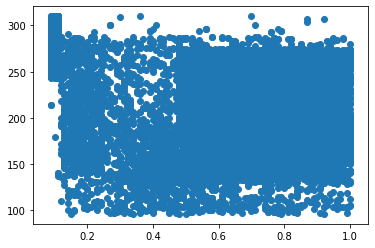

In [3]:
satisfaction_level = data['satisfaction_level']
average_montly_hours = data['average_montly_hours']
plt.scatter(satisfaction_level, average_montly_hours)
from scipy.stats.stats import pearsonr
scipy.stats.pearsonr(satisfaction_level.values.tolist(), average_montly_hours)
scipy.stats.ttest_ind(satisfaction_level.values.tolist(), average_montly_hours)

In [ ]:
# Вывод. Корреляции между двумя переменными не выявлено, т.к. pvalue = 0. Другими словами уровень удовлетворенности от 
# работы не зависит напрямую от количества отработанных рабочих часов в месяц.

Ttest_indResult(statistic=-238.58170166684755, pvalue=0.0)

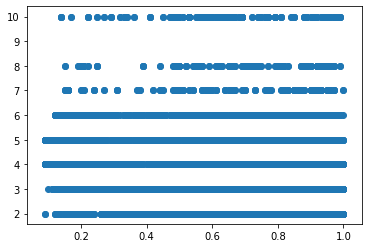

In [4]:
satisfaction_level = data['satisfaction_level']
time_spend_company = data['time_spend_company']
plt.scatter(satisfaction_level, time_spend_company)

from scipy.stats.stats import pearsonr
scipy.stats.pearsonr(satisfaction_level.values.tolist(), time_spend_company)
scipy.stats.ttest_ind(satisfaction_level.values.tolist(), time_spend_company)

In [ ]:
# Вывод. Корреляции между двумя переменными не выявлено, т.к. pvalue = 0. Другими словами уровень удовлетворенности от 
# работы не зависит напрямую от числа лет отработанных работником в одной компании.

Ttest_indResult(statistic=484.23011415607965, pvalue=0.0)

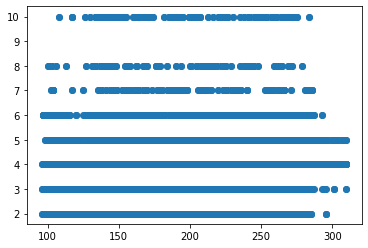

In [5]:
average_montly_hours = data['average_montly_hours']
time_spend_company = data['time_spend_company']
plt.scatter(average_montly_hours, time_spend_company)

from scipy.stats.stats import pearsonr
scipy.stats.pearsonr(average_montly_hours.values.tolist(), time_spend_company)
scipy.stats.ttest_ind(average_montly_hours.values.tolist(), time_spend_company)

In [ ]:
# Вывод. Корреляции между двумя переменными не выявлено, т.к. pvalue = 0. Другими словами кол-во отработанных часов в месяц
# одним работником не зависит от числа лет проработанных в компании.

6.Рассчитать сколько работников работает в каждом департаменте.

In [6]:
data1 = data[['sales']].groupby(['sales']).size().reset_index(name='count')
data1 = data1.sort_values('count', ascending=False)
print(data1)

         sales  count
7        sales   4140
9    technical   2720
8      support   2229
0           IT   1227
6  product_mng    902
5    marketing    858
1        RandD    787
2   accounting    767
3           hr    739
4   management    630


In [ ]:
# Вывод. Самое большое число работников работает в сфере продаж, меньше всего людей работает в сфере управления

7.Показать распределение сотрудников по зарплатам.

In [11]:
data1 = data[['salary']].groupby(['salary']).size().reset_index(name='count')
data1 = data1.sort_values('count', ascending=False)
print(data1)

   salary  count
1     low   7316
2  medium   6446
0    high   1237


In [ ]:
# Вывод. У большинства работников низкая заработная плата. 

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [38]:
data1 = data[['sales']].groupby(['sales']).size().reset_index(name='count')
data2 = data.loc[data['salary'] == 'high'].groupby(['sales']).size().reset_index(name='high')
data3 = data.loc[data['salary'] == 'medium'].groupby(['sales']).size().reset_index(name='medium')
data4 = data.loc[data['salary'] == 'low'].groupby(['sales']).size().reset_index(name='low')
data1 = data1.merge(data2).merge(data3).merge(data4)
print(data1)

         sales  count  high  medium   low
0           IT   1227    83     535   609
1        RandD    787    51     372   364
2   accounting    767    74     335   358
3           hr    739    45     359   335
4   management    630   225     225   180
5    marketing    858    80     376   402
6  product_mng    902    68     383   451
7        sales   4140   269    1772  2099
8      support   2229   141     942  1146
9    technical   2720   201    1147  1372


9.Сколько сотрудников покинули компанию.

In [48]:
print(len(data.loc[data['left'] == 1]))

3571


In [ ]:
# Вывод. Всего 3571 чел. уволились из компаний. 

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

(0.7838732962094205, 0.0)

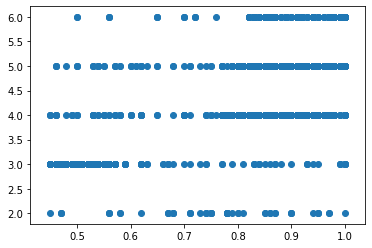

In [83]:
data1 = data.loc[data['left'] == 1]
last_evaluation = data1['last_evaluation']
time_spend_company = data1['time_spend_company']
plt.scatter(last_evaluation, time_spend_company)

from scipy.stats.stats import pearsonr
scipy.stats.pearsonr(last_evaluation.values.tolist(), time_spend_company)
#scipy.stats.ttest_ind(last_evaluation.values.tolist(), time_spend_company)

In [ ]:
#Гипотеза о том, что увольняются те, кто получил наивысшие оценки верна. Наблюдается тенденция , что чем больше стаж работы
# и выше оценка, тем чаще происходят увольнения. Т.е. объясняется желанием найти работу с более высокой зарплатой наработав
#хороший стаж и навыки.

   time_spend_company  count  high  medium  low
0                   2     53   NaN      31   22
1                   3   1586  46.0     554  986
2                   4    890  16.0     333  541
3                   5    833  20.0     325  488
4                   6    209   NaN      74  135


(-0.10571753856946772, 0.8656473976939569)

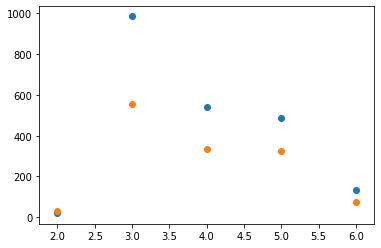

In [84]:
data1 = data.loc[data['left'] == 1]
data2 = data1[['time_spend_company']].groupby(['time_spend_company']).size().reset_index(name='count')
data3 = data1.loc[data1['salary'] == 'high'].groupby(['time_spend_company']).size().reset_index(name='high')
data4 = data1.loc[data1['salary'] == 'medium'].groupby(['time_spend_company']).size().reset_index(name='medium')
data5 = data1.loc[data1['salary'] == 'low'].groupby(['time_spend_company']).size().reset_index(name='low')
data2 = data2.merge(data3, how='left').merge(data4, how='left').merge(data5, how='left')
print(data2)
time_spend_company = data2['time_spend_company']
salary = data2['low']
plt.scatter(time_spend_company, salary)

from scipy.stats.stats import pearsonr
scipy.stats.pearsonr(time_spend_company.values.tolist(), salary)

salary = data2['medium']
plt.scatter(time_spend_company, salary)
scipy.stats.pearsonr(time_spend_company.values.tolist(), salary)

In [ ]:
#Гипотеза о том, что увольняюься те, у кого низкая заработная плата верна. Видно, что самый высокий скачок увольнения
#приходится на момент , когда человек проработал 3 года, но получает все также маленькую зарплату.